<a href="https://colab.research.google.com/github/Creative-Skull/Creative-Skull/blob/main/Detection_of_parkinson's_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data=pd.read_csv("/content/parkinsons.csv")
data.columns

In [ ]:
data

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


###Checking for duplicates in data


In [ ]:
print(data.shape)
data.drop_duplicates(inplace=True)
data.shape
#Data has no duplicates

(195, 24)


(195, 24)

In [ ]:
data.corr()

<ipython-input-59-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


<ipython-input-60-b764711d9f67>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

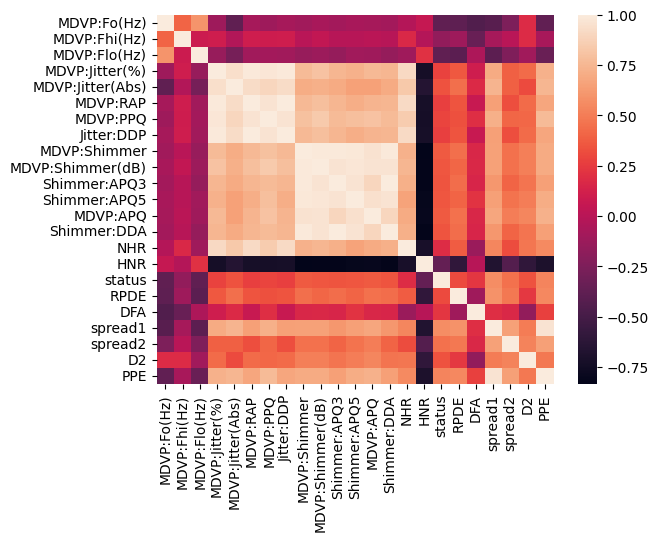

In [ ]:
import seaborn as sns
sns.heatmap(data.corr())

In [ ]:
data.drop('name',axis=1,inplace=True)

array([[<Axes: title={'center': 'MDVP:Fo(Hz)'}>,
        <Axes: title={'center': 'MDVP:Fhi(Hz)'}>,
        <Axes: title={'center': 'MDVP:Flo(Hz)'}>,
        <Axes: title={'center': 'MDVP:Jitter(%)'}>,
        <Axes: title={'center': 'MDVP:Jitter(Abs)'}>],
       [<Axes: title={'center': 'MDVP:RAP'}>,
        <Axes: title={'center': 'MDVP:PPQ'}>,
        <Axes: title={'center': 'Jitter:DDP'}>,
        <Axes: title={'center': 'MDVP:Shimmer'}>,
        <Axes: title={'center': 'MDVP:Shimmer(dB)'}>],
       [<Axes: title={'center': 'Shimmer:APQ3'}>,
        <Axes: title={'center': 'Shimmer:APQ5'}>,
        <Axes: title={'center': 'MDVP:APQ'}>,
        <Axes: title={'center': 'Shimmer:DDA'}>,
        <Axes: title={'center': 'NHR'}>],
       [<Axes: title={'center': 'HNR'}>,
        <Axes: title={'center': 'status'}>,
        <Axes: title={'center': 'RPDE'}>,
        <Axes: title={'center': 'DFA'}>,
        <Axes: title={'center': 'spread1'}>],
       [<Axes: title={'center': 'spread2'}>,
   

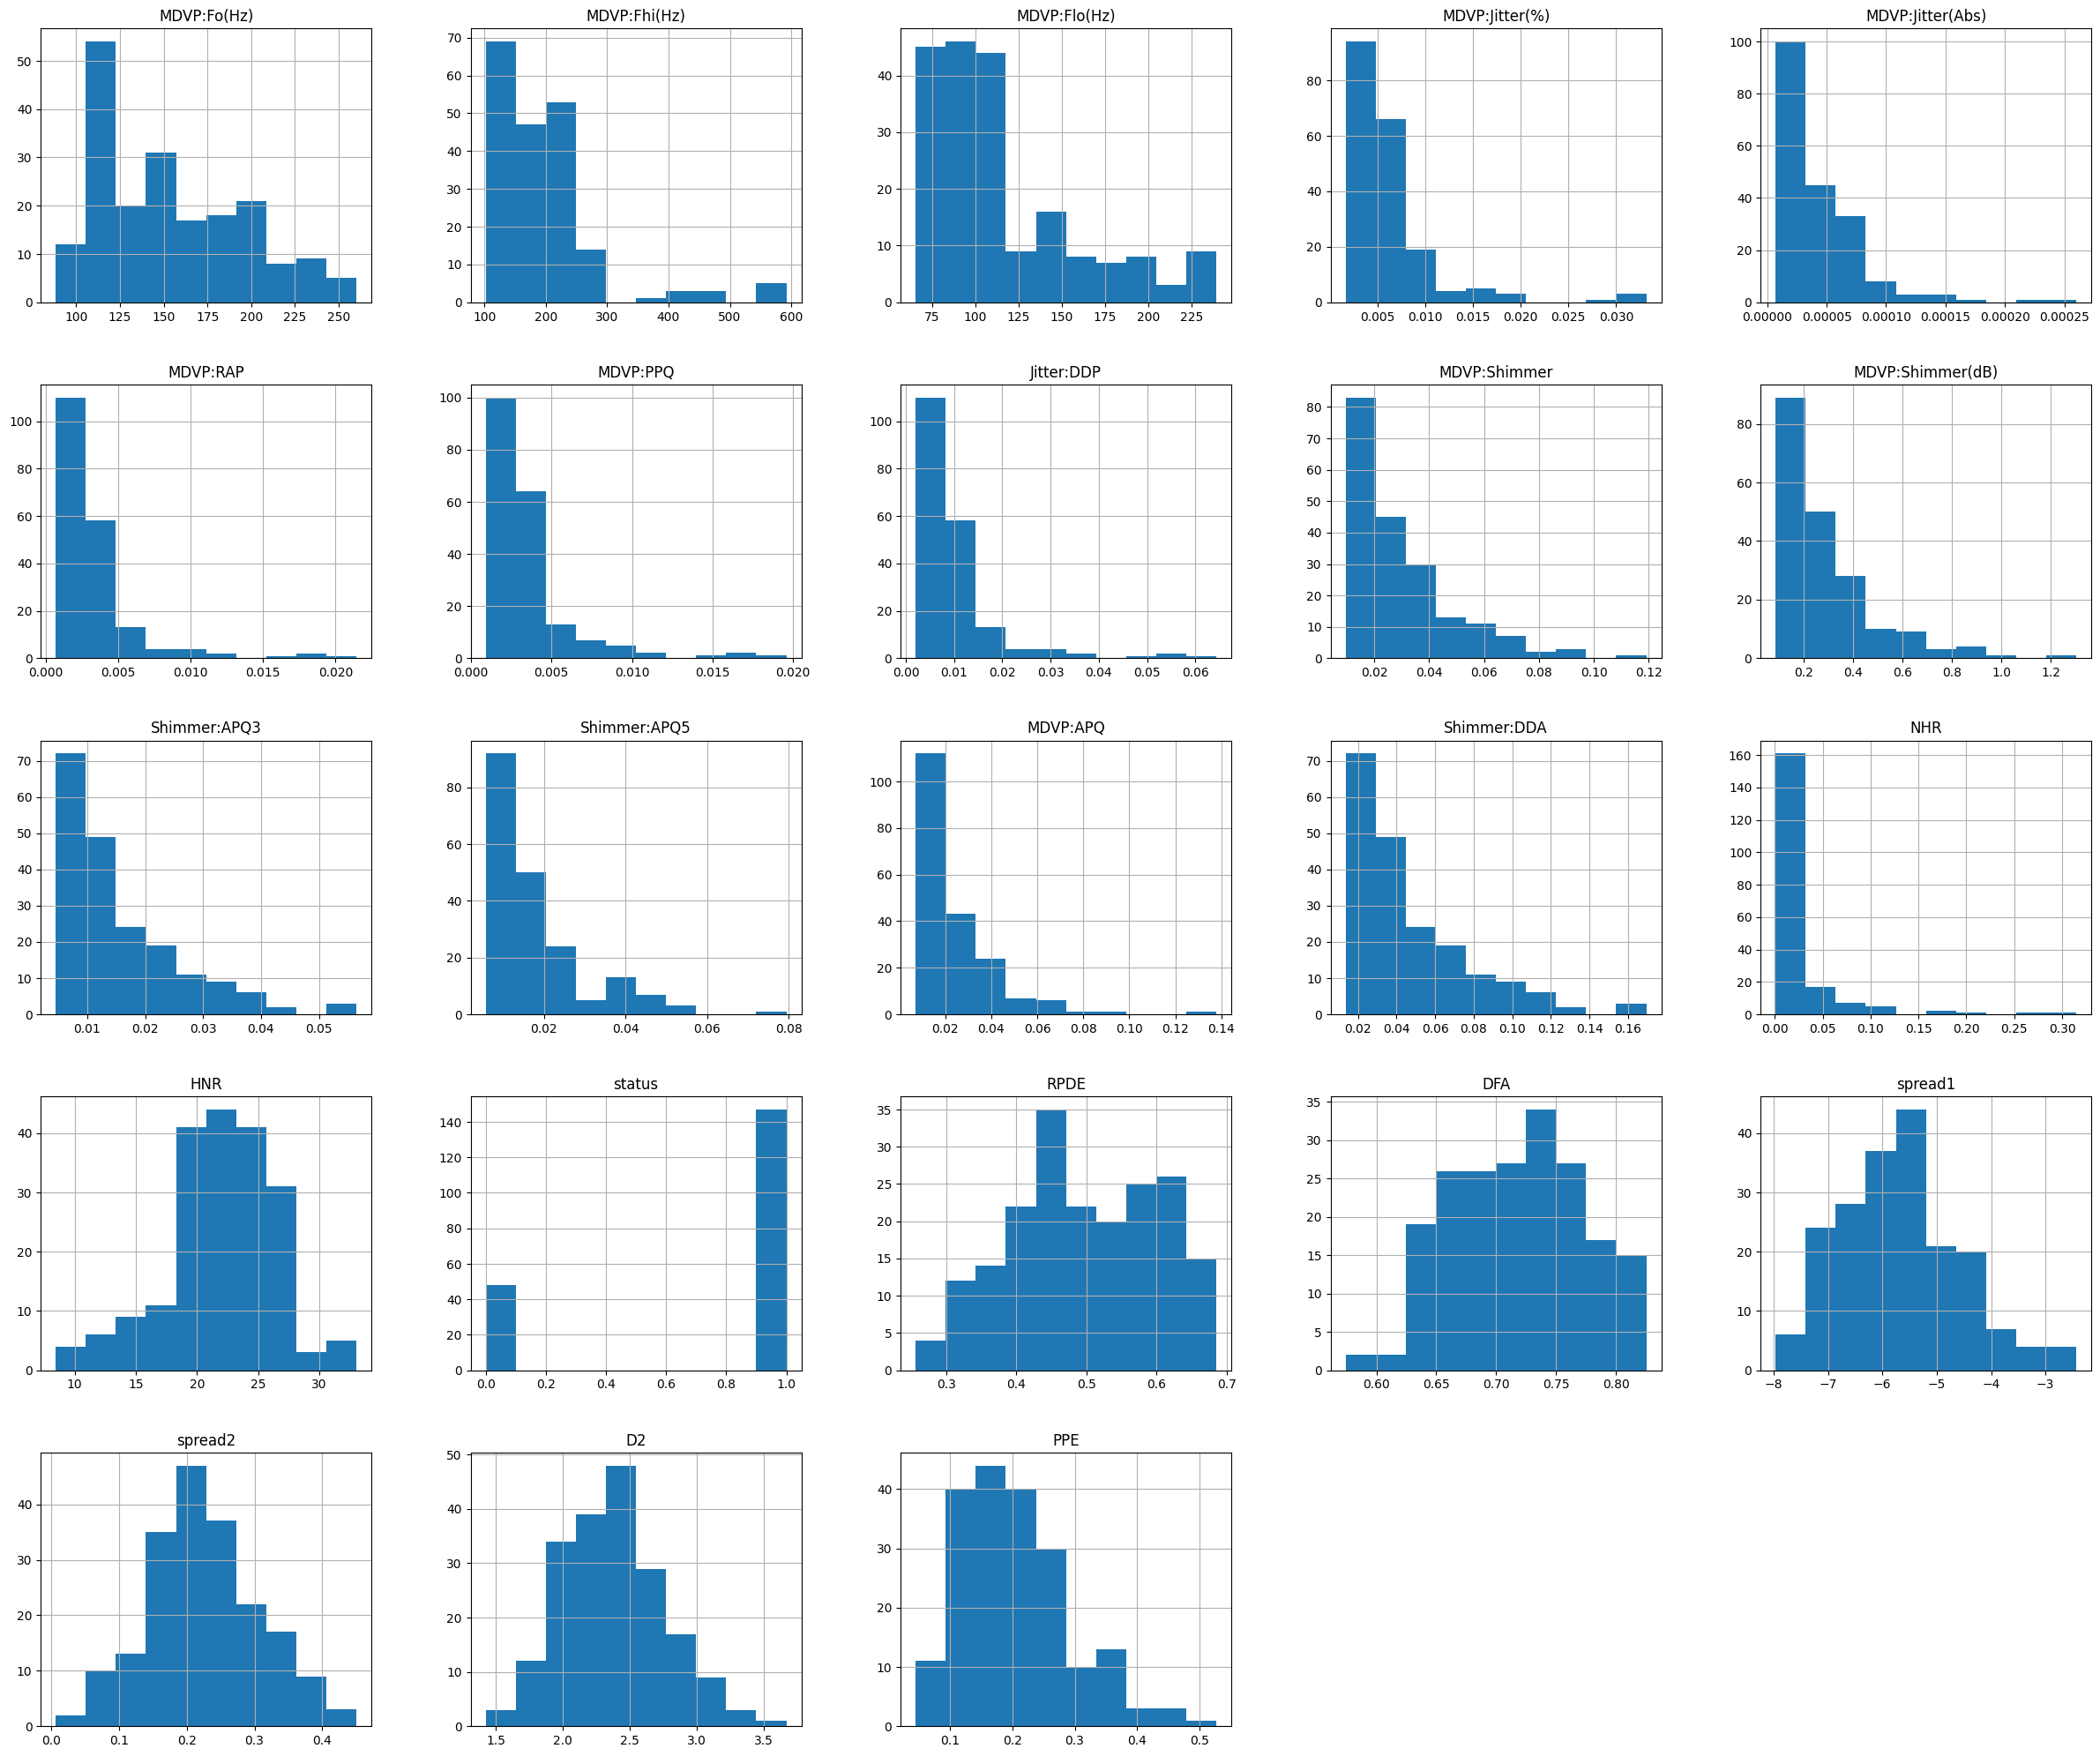

In [ ]:
data.hist(figsize=(30,25))

In [ ]:
X=data.drop('status',axis=1)
Y=data['status']
X.shape,Y.shape

((195, 22), (195,))

In [ ]:
Y.value_counts()

1    147
0     48
Name: status, dtype: int64

In [ ]:
#Data standardiztion
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_Sc=scaler.fit_transform(X)

In [ ]:
#Test Train Model
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_Sc,Y,test_size=0.2,random_state=58)

In [ ]:
X_train

array([[0.48149873, 0.21672025, 0.05771644, ..., 0.49526022, 0.51889835,
        0.21304481],
       [0.88470764, 0.29188483, 0.88838417, ..., 0.15088053, 0.37508653,
        0.11669166],
       [0.35005123, 0.12029966, 0.44055638, ..., 0.47258222, 0.55870629,
        0.31723719],
       ...,
       [0.49824186, 0.18492095, 0.11919813, ..., 0.4592442 , 0.50012768,
        0.43290157],
       [0.64067485, 0.23078478, 0.73478646, ..., 0.38023362, 0.03958773,
        0.10724523],
       [0.65861142, 0.22131725, 0.74977835, ..., 0.36898242, 0.45544356,
        0.02707175]])

In [ ]:
X_test,y_test

(array([[0.04525185, 0.0133072 , 0.10958352, 0.16709022, 0.24901186,
         0.15462428, 0.17309753, 0.15475999, 0.28026292, 0.22925226,
         0.34880586, 0.25522388, 0.16517344, 0.34888946, 0.05595697,
         0.43135821, 0.67253331, 0.78159088, 0.63704483, 0.33502169,
         0.54392518, 0.58703928],
        [0.07240412, 0.02766364, 0.11554228, 0.27636595, 0.36758893,
         0.26685934, 0.25937835, 0.26665596, 0.19782728, 0.22678718,
         0.25385208, 0.16458616, 0.10873727, 0.25394788, 0.06859344,
         0.43725108, 0.78822206, 0.85987984, 0.55164074, 0.58400249,
         0.43380439, 0.4834206 ],
        [0.13917286, 0.04993825, 0.22233929, 0.09656925, 0.13043478,
         0.08188825, 0.10610932, 0.08203564, 0.42806281, 0.35497124,
         0.50365948, 0.40162822, 0.28577992, 0.5037232 , 0.08161187,
         0.36271641, 0.89685497, 0.50645005, 0.42133932, 0.67475727,
         0.44307139, 0.34101585],
        [0.14096593, 0.06374761, 0.23166603, 0.0594028 , 0.09090909,
 

In [ ]:
import matplotlib.pyplot as plt
from sklearn import svm
parkinson_model=svm.SVC(kernel='linear')
parkinson_model.fit(X_train,y_train)
from sklearn.linear_model import LogisticRegression
parkinson_model1=LogisticRegression()
parkinson_model1.fit(X_train,y_train)
from sklearn.tree import DecisionTreeClassifier, plot_tree
parkinson_model2=DecisionTreeClassifier()
parkinson_model2.fit(X_train, y_train)

# fig = plt.figure(figsize=(25,20))
# tree = plot_tree(DTC, feature_names = [ c for c in df.drop(['name'],axis=1).columns], class_names=['0','1'], filled=True)


DecisionTreeClassifier()

In [ ]:
test_pred=parkinson_model.predict(X_test)
test_pred.shape,y_test.shape

((39,), (39,))

In [ ]:
test_pred1=parkinson_model1.predict(X_test)
test_pred1.shape,y_test.shape

((39,), (39,))

In [ ]:
test_pred2 = parkinson_model2.predict(X_test)
test_pred2.shape,y_test.shape

((39,), (39,))

In [ ]:
import numpy as np
y_test1=np.array(y_test)
y_test1,test_pred

(array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))

In [ ]:
pd.DataFrame({'actual':y_test1,'predict':test_pred})

,actual,predict
0,1,1
1,1,1
2,1,1
3,0,1
4,0,0
5,1,1
6,0,1
7,1,1
8,1,1
9,1,1


In [ ]:
pd.DataFrame({'actual':y_test,'predict':test_pred1})

,actual,predict
80,1,1
79,1,1
138,1,1
171,0,1
63,0,0
58,1,1
176,0,1
145,1,1
103,1,0
127,1,1


In [ ]:
pd.DataFrame({'actual':y_test,'predict':test_pred2})

,actual,predict
80,1,0
79,1,1
138,1,1
171,0,1
63,0,0
58,1,1
176,0,0
145,1,1
103,1,0
127,1,1


In [ ]:
# SCORE CHECK
from sklearn.metrics import accuracy_score
accuracy_score(y_test1,test_pred)

0.8461538461538461

In [ ]:
accuracy_score(y_test,test_pred1)

0.7948717948717948

In [ ]:
accuracy_score(y_test,test_pred2)

0.8717948717948718

In [ ]:
# PREDICTION MODEL
Parkinson_data = (223.365,238.987,98.664,0.00264,0.00001,0.00154,0.00151,0.00461,0.01906,0.165,0.01013,0.01296,0.0134,0.03039,0.00301,26.138,0.447979,0.686264,-7.293801,0.086372,2.32156,0.098555)
Parkinson_data = np.asarray(Parkinson_data)
Parkinson_data = Parkinson_data.reshape(1,-1)
std_data = scaler.transform(Parkinson_data)
prediction = parkinson_model2.predict(std_data)

print(prediction)
if prediction == 0:
    print("The Person does not have Parkinsson's Disease")
else:
    print("The Person does have Parkinsson's Disease")

[0]
The Person does not have Parkinsson's Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


0    118
1    104
Name: status, dtype: int64


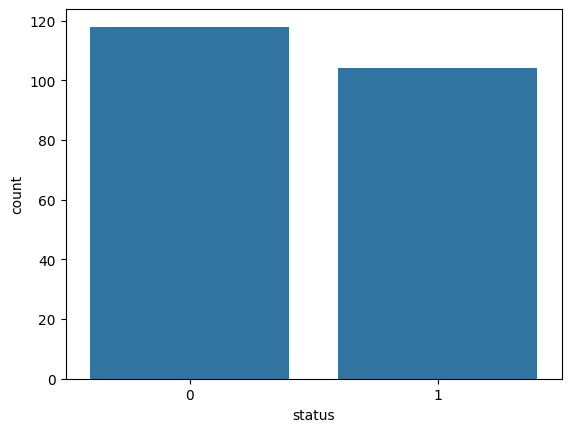

In [ ]:
from imblearn.combine import SMOTEENN
smote = SMOTEENN(random_state=42)
X_smote, y_smote = smote.fit_resample(X, Y)
smote_data = pd.concat([X_smote, y_smote], axis=1)

ax = sns.countplot(x="status", data=smote_data)
print(smote_data.status.value_counts())

X_smote_train, X_smote_test, y_smote_train, y_smote_test = train_test_split(X_smote, y_smote,train_size=0.8,random_state=42)

X_smote_train = scaler.fit_transform(X_smote_train)
X_smote_test = scaler.transform(X_smote_test)

X_train = X_smote_train
X_test = X_smote_test
y_train = y_smote_train
y_test = y_smote_test


In [ ]:
parkinson_model2.fit(X_smote_train,y_smote_train)
parkinson_model1.fit(X_smote_train,y_smote_train)
parkinson_model.fit(X_smote_train,y_smote_train)

SVC(kernel='linear')

In [ ]:
y_smote_pred=parkinson_model.predict(X_smote_train)
print(y_smote_pred,y_smote_train)

[0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1
 0 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 1
 1 0 0 1 0 1 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1
 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0
 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0] 73     0
150    1
95     0
117    0
75     0
      ..
106    0
14     0
92     0
179    1
102    0
Name: status, Length: 177, dtype: int64


In [ ]:
accuracy_score(y_smote_pred,y_smote_train)

0.8531073446327684

In [ ]:
y_smote_pred1=parkinson_model1.predict(X_smote_train)
print(y_smote_pred1,y_smote_train)

[1 1 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 0 0 1
 0 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 1
 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1
 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 0 0 1 1
 0 1 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0] 73     0
150    1
95     0
117    0
75     0
      ..
106    0
14     0
92     0
179    1
102    0
Name: status, Length: 177, dtype: int64


In [ ]:
accuracy_score(y_smote_train,y_smote_pred1)

0.8305084745762712

In [ ]:
y_smote_pred2=parkinson_model2.predict(X_smote_test)
print(y_smote_pred2,y_smote_test)

[1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1
 1 0 1 1 1 1 0 1] 154    1
215    1
15     0
173    1
158    1
125    1
97     0
25     0
60     0
68     0
126    1
163    1
142    1
115    0
45     0
9      0
100    0
96     0
18     0
176    1
82     0
30     0
190    1
66     0
111    0
55     0
67     0
170    1
118    1
69     0
93     0
16     0
109    0
155    1
112    0
143    1
197    1
211    1
79     0
139    1
140    1
119    1
219    1
84     0
124    1
Name: status, dtype: int64


In [ ]:
accuracy_score(y_smote_test,y_smote_pred2)

1.0

In [ ]:
data1=pd.read_csv("/content/parkinson+dataset+with+replicated+acoustic+features.zip")
data1

,ID,Recording,Status,Gender,Jitter_rel,Jitter_abs,Jitter_RAP,Jitter_PPQ,Shim_loc,Shim_dB,...,Delta3,Delta4,Delta5,Delta6,Delta7,Delta8,Delta9,Delta10,Delta11,Delta12
0,CONT-01,1,0,1,0.25546,0.000015,0.001467,0.001673,0.030256,0.26313,...,1.407701,1.417218,1.380352,1.420670,1.451240,1.440295,1.403678,1.405495,1.416705,1.354610
1,CONT-01,2,0,1,0.36964,0.000022,0.001932,0.002245,0.023146,0.20217,...,1.331232,1.227338,1.213377,1.352739,1.354242,1.365692,1.322870,1.314549,1.318999,1.323508
2,CONT-01,3,0,1,0.23514,0.000013,0.001353,0.001546,0.019338,0.16710,...,1.412304,1.324674,1.276088,1.429634,1.455996,1.368882,1.438053,1.388910,1.305469,1.305402
3,CONT-02,1,0,0,0.29320,0.000017,0.001105,0.001444,0.024716,0.20892,...,1.501200,1.534170,1.323993,1.496442,1.472926,1.643177,1.551286,1.638346,1.604008,1.621456
4,CONT-02,2,0,0,0.23075,0.000015,0.001073,0.001404,0.013119,0.11607,...,1.508468,1.334511,1.610694,1.685021,1.417614,1.574895,1.640088,1.533666,1.297536,1.382023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,PARK-39,2,1,0,0.57585,0.000037,0.003701,0.005149,0.016868,0.14928,...,1.116409,1.104511,1.099866,1.080320,1.154057,1.117423,1.167076,1.132436,1.107824,1.109144
236,PARK-39,3,1,0,0.23322,0.000015,0.001270,0.001497,0.017923,0.16720,...,1.107477,1.083859,1.101819,1.114161,1.090095,1.140705,1.126667,1.158444,1.096073,1.141835
237,PARK-40,1,1,0,0.26862,0.000022,0.001354,0.001615,0.028040,0.24182,...,1.335189,1.385580,1.281551,1.367171,1.319055,1.367095,1.343193,1.374330,1.383364,1.456409
238,PARK-40,2,1,0,0.45376,0.000037,0.002724,0.002258,0.064605,0.58002,...,1.327629,1.349928,1.461323,1.350599,1.346363,1.415338,1.361937,1.331923,1.423062,1.307353
